# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create empty lists for storing weather data from API
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set initial count of 1 for loop
record =1

# Include a print log of each city as it'sbeing processed (with the city number and city name).
print(f"-------------------------------")
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

-------------------------------
Beginning Data Retrieval
-------------------------------


In [15]:
# fetch data for each city in list, using FOR loop (try enumerate in the FOR loop, see link from Raina)
for city in cities:
    try:        # TRY statement appends when value is not NULL (city exists in CityPy module)
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1 # Increment counter  
        time.sleep(1.01) # Pause for one second in loop, to avoid maxing out API limit
    except: # EXCEPT skips to next row, where OpenWeatherMap is missing the city generated by CityPy module
        print("City not found. Skipping...")
    continue

Processing Record 1 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?&q=fairbanks
Processing Record 2 | Mehamn
http://api.openweathermap.org/data/2.5/weather?&q=mehamn
Processing Record 3 | Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea
Processing Record 4 | East London
http://api.openweathermap.org/data/2.5/weather?&q=east london
Processing Record 5 | Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura
City not found. Skipping...
Processing Record 6 | Dudinka
http://api.openweathermap.org/data/2.5/weather?&q=dudinka
Processing Record 7 | Luganville
http://api.openweathermap.org/data/2.5/weather?&q=luganville
Processing Record 8 | Santa Cruz de Barahona
http://api.openweathermap.org/data/2.5/weather?&q=barahona
Processing Record 9 | Daru
http://api.openweathermap.org/data/2.5/weather?&q=daru
Processing Record 10 | Vaini
http://api.openweathermap.org/data/2.5/weather?&q=vaini
Processing Record 11 | Atuona
http://api.openweathermap.org/data/2.5/

Processing Record 89 | Lázaro Cárdenas
http://api.openweathermap.org/data/2.5/weather?&q=lazaro cardenas
Processing Record 90 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?&q=olafsvik
Processing Record 91 | North Bend
http://api.openweathermap.org/data/2.5/weather?&q=north bend
Processing Record 92 | Chicama
http://api.openweathermap.org/data/2.5/weather?&q=chicama
Processing Record 93 | Pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?&q=pangkalanbuun
Processing Record 94 | Tabas
http://api.openweathermap.org/data/2.5/weather?&q=tabas
Processing Record 95 | Saint George
http://api.openweathermap.org/data/2.5/weather?&q=saint george
Processing Record 96 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat
Processing Record 97 | Airai
http://api.openweathermap.org/data/2.5/weather?&q=airai
Processing Record 98 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?&q=gat
Processing Record 99 | Matara
http://api.openweathermap.org/data/2.5/

Processing Record 173 | São Filipe
http://api.openweathermap.org/data/2.5/weather?&q=sao filipe
City not found. Skipping...
Processing Record 174 | Artyom
http://api.openweathermap.org/data/2.5/weather?&q=artyom
Processing Record 175 | Nome
http://api.openweathermap.org/data/2.5/weather?&q=nome
Processing Record 176 | Margate
http://api.openweathermap.org/data/2.5/weather?&q=margate
Processing Record 177 | Codrington
http://api.openweathermap.org/data/2.5/weather?&q=codrington
Processing Record 178 | Le Port
http://api.openweathermap.org/data/2.5/weather?&q=le port
Processing Record 179 | Biak
http://api.openweathermap.org/data/2.5/weather?&q=biak
Processing Record 180 | Hasaki
http://api.openweathermap.org/data/2.5/weather?&q=hasaki
Processing Record 181 | Thatta
http://api.openweathermap.org/data/2.5/weather?&q=thatta
Processing Record 182 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?&q=tuatapere
Processing Record 183 | Blythe
http://api.openweathermap.org/data/2.5/weat

Processing Record 260 | Buritis
http://api.openweathermap.org/data/2.5/weather?&q=buritis
Processing Record 261 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?&q=haines junction
Processing Record 262 | Touros
http://api.openweathermap.org/data/2.5/weather?&q=touros
Processing Record 263 | Vega de Alatorre
http://api.openweathermap.org/data/2.5/weather?&q=vega de alatorre
Processing Record 264 | Iquique
http://api.openweathermap.org/data/2.5/weather?&q=iquique
Processing Record 265 | Parrita
http://api.openweathermap.org/data/2.5/weather?&q=parrita
Processing Record 266 | Russi
http://api.openweathermap.org/data/2.5/weather?&q=russi
City not found. Skipping...
Processing Record 267 | São João da Barra
http://api.openweathermap.org/data/2.5/weather?&q=sao joao da barra
City not found. Skipping...
Processing Record 268 | Presidencia Roque Sáenz Peña
http://api.openweathermap.org/data/2.5/weather?&q=presidencia roque saenz pena
Processing Record 269 | Moose Factory
http:/

Processing Record 346 | Kirksville
http://api.openweathermap.org/data/2.5/weather?&q=kirksville
Processing Record 347 | Praia
http://api.openweathermap.org/data/2.5/weather?&q=praia
City not found. Skipping...
Processing Record 348 | Krasnosel'kup
http://api.openweathermap.org/data/2.5/weather?&q=krasnoselkup
Processing Record 349 | Voh
http://api.openweathermap.org/data/2.5/weather?&q=voh
Processing Record 350 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?&q=vila franca do campo
Processing Record 351 | Ikom
http://api.openweathermap.org/data/2.5/weather?&q=ikom
Processing Record 352 | Jacqueville
http://api.openweathermap.org/data/2.5/weather?&q=jacqueville
Processing Record 353 | Tupik
http://api.openweathermap.org/data/2.5/weather?&q=tupik
City not found. Skipping...
Processing Record 354 | Aleppo Governorate
http://api.openweathermap.org/data/2.5/weather?&q=aleppo
City not found. Skipping...
Processing Record 355 | Mount Isa
http://api.openweathermap.org/dat

Processing Record 432 | Roald
http://api.openweathermap.org/data/2.5/weather?&q=roald
Processing Record 433 | Itoman
http://api.openweathermap.org/data/2.5/weather?&q=itoman
City not found. Skipping...
Processing Record 434 | San Quintín
http://api.openweathermap.org/data/2.5/weather?&q=san quintin
Processing Record 435 | Abnūb
http://api.openweathermap.org/data/2.5/weather?&q=abnub
Processing Record 436 | Piñas
http://api.openweathermap.org/data/2.5/weather?&q=pinas
Processing Record 437 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?&q=nouadhibou
Processing Record 438 | Clyde River
http://api.openweathermap.org/data/2.5/weather?&q=clyde river
Processing Record 439 | Maceió
http://api.openweathermap.org/data/2.5/weather?&q=maceio
Processing Record 440 | Khargone
http://api.openweathermap.org/data/2.5/weather?&q=khargone
Processing Record 441 | Leh
http://api.openweathermap.org/data/2.5/weather?&q=leh
Processing Record 442 | Fukuechō
http://api.openweathermap.org/data/2.5/

Processing Record 520 | Krasnyy Klyuch
http://api.openweathermap.org/data/2.5/weather?&q=krasnyy klyuch
Processing Record 521 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?&q=kulhudhuffushi
Processing Record 522 | Arrecife
http://api.openweathermap.org/data/2.5/weather?&q=arrecife
Processing Record 523 | Bahua
http://api.openweathermap.org/data/2.5/weather?&q=bahua
Processing Record 524 | Auki
http://api.openweathermap.org/data/2.5/weather?&q=auki
Processing Record 525 | Kabo
http://api.openweathermap.org/data/2.5/weather?&q=kabo
Processing Record 526 | Sirte
http://api.openweathermap.org/data/2.5/weather?&q=surt
Processing Record 527 | Tonekābon
http://api.openweathermap.org/data/2.5/weather?&q=tonekabon
Processing Record 528 | Malbork
http://api.openweathermap.org/data/2.5/weather?&q=marienburg
Processing Record 529 | Mahibadhoo
http://api.openweathermap.org/data/2.5/weather?&q=mahibadhoo
Processing Record 530 | Atasū
http://api.openweathermap.org/data/2.5/weather?&

In [17]:
weather_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fairbanks,20,US,1604379905,75,64.84,-147.72,-14.80,1.01
1,Mehamn,75,NO,1604379966,80,71.04,27.85,41.00,18.34
2,Rikitea,33,PF,1604379968,79,-23.12,-134.97,72.01,18.05
3,East London,0,ZA,1604379969,93,-33.02,27.91,64.40,4.70
4,Mataura,0,NZ,1604379970,67,-46.19,168.86,59.00,8.99
...,...,...,...,...,...,...,...,...,...
526,Tonekābon,90,IR,1604380473,82,36.82,50.87,66.20,2.24
527,Malbork,79,PL,1604380655,94,54.04,19.03,55.99,6.93
528,Mahibadhoo,22,MV,1604380657,68,3.78,72.97,83.57,6.35
529,Atasū,65,KZ,1604380658,76,48.68,71.64,37.26,3.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = True)

weather_df.to_csv('output_data/cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fairbanks,20,US,1604379905,75,64.84,-147.72,-14.80,1.01
1,Mehamn,75,NO,1604379966,80,71.04,27.85,41.00,18.34
2,Rikitea,33,PF,1604379968,79,-23.12,-134.97,72.01,18.05
3,East London,0,ZA,1604379969,93,-33.02,27.91,64.40,4.70
4,Mataura,0,NZ,1604379970,67,-46.19,168.86,59.00,8.99
...,...,...,...,...,...,...,...,...,...
526,Tonekābon,90,IR,1604380473,82,36.82,50.87,66.20,2.24
527,Malbork,79,PL,1604380655,94,54.04,19.03,55.99,6.93
528,Mahibadhoo,22,MV,1604380657,68,3.78,72.97,83.57,6.35
529,Atasū,65,KZ,1604380658,76,48.68,71.64,37.26,3.80


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

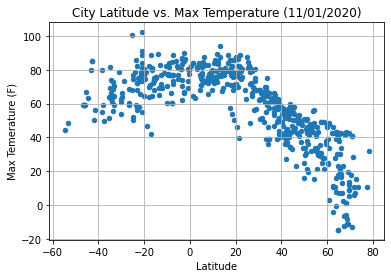

In [19]:
weather_df.plot('Lat', 'Max Temp', kind='scatter')
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.show()


## Latitude vs. Humidity Plot

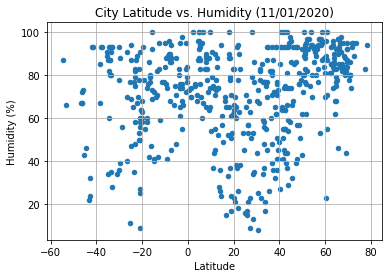

In [20]:
weather_df.plot('Lat', 'Humidity', kind='scatter')
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.show()

## Latitude vs. Cloudiness Plot

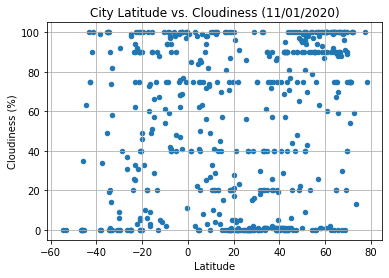

In [21]:
weather_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.show()

## Latitude vs. Wind Speed Plot

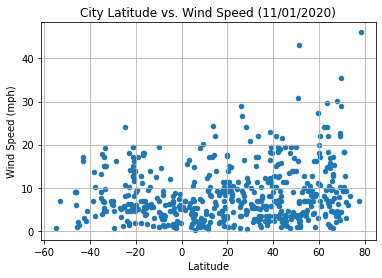

In [22]:
weather_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:

# Create dataframe from above Dictionary
north_hemisphere_df = pd.DataFrame(weather_dictionary)
# Create Northern Hemisphere DataFrame (drop all rows with Latitude less than zero)
north_hemisphere_df.drop(north_hemisphere_df[north_hemisphere_df["Lat"] < 0].index, inplace = True)
# Create and save CSV file from above DataFrame
north_hemisphere_df.to_csv('output_data/north_hemisphere_cities.csv')
# Perform a linear regression on latitude vs. temperature
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/North_Hemisphere_Lat_vs_Temp.png")
plt.show()

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
# Create dataframe from above Dictionary
south_hemisphere_df = pd.DataFrame(weather_dictionary)
# Create Northern Hemisphere DataFrame (drop all rows with Latitude less than zero)
south_hemisphere_df.drop(south_hemisphere_df[south_hemisphere_df["Lat"] > 0].index, inplace = True)
# Create and save CSV file from above DataFrame
south_hemisphere_df.to_csv('output_data/south_hemisphere_cities.csv')
# Perform a linear regression on latitude vs. temperature
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/South_Hemisphere_Lat_vs_Temp.png")
plt.show()

NameError: name 'stats' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/North_Hemisphere_Lat_vs_Humid.png")
plt.show()

NameError: name 'stats' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


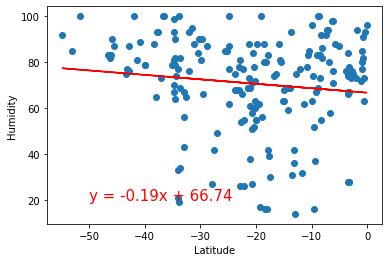

In [28]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/South_Hemisphere_Lat_vs_Humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/North_Hemisphere_Lat_vs_Cloud.png")
plt.show()

NameError: name 'stats' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/South_Hemisphere_Lat_vs_Cloud.png")
plt.show()

NameError: name 'stats' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/North_Hemisphere_Lat_vs_Wind.png")
plt.show()

NameError: name 'stats' is not defined

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Save the figure & show the chart
plt.savefig("output_data/South_Hemisphere_Lat_vs_Wind.png")
plt.show()

NameError: name 'stats' is not defined